In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("cars.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [5]:
# replace null values with mean of normalized losses.
df["normalized-losses"].replace("?",np.nan,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [7]:
df["normalized-losses"]=df["normalized-losses"].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 24.1+ KB


In [9]:
# change data type and drop null values
df["horsepower"].replace("?",np.nan,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

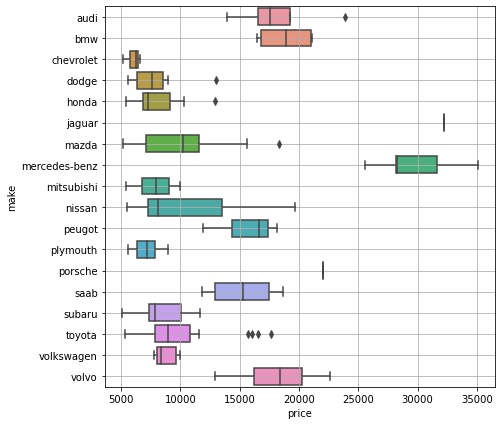

In [12]:
# finding and removing outliers
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x="price",y="make")
plt.grid(True)
plt.show()

In [13]:
#removing outliers of toyota
df[(df["make"]=="toyota") & (df["price"]>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156,20,24,15690


In [14]:
df.drop(index=[172,178,179,180],inplace=True)

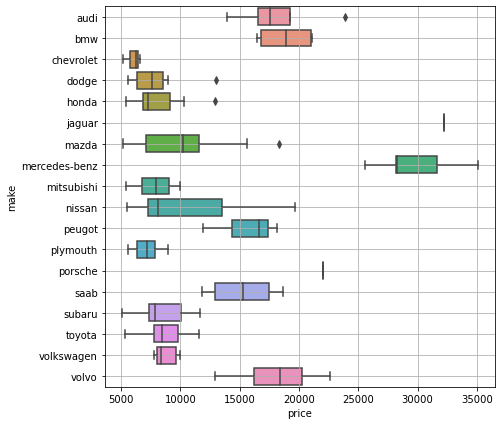

In [15]:
# finding and removing outliers
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x="price",y="make")
plt.grid(True)
plt.show()

In [16]:
#removing outliers of audi
df[(df["make"]=="audi") & (df["price"]>18000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
8,1,158.0,audi,gas,sedan,fwd,front,71.4,55.9,ohc,131,140,17,20,23875


In [17]:
df.drop(index=[8],inplace=True)

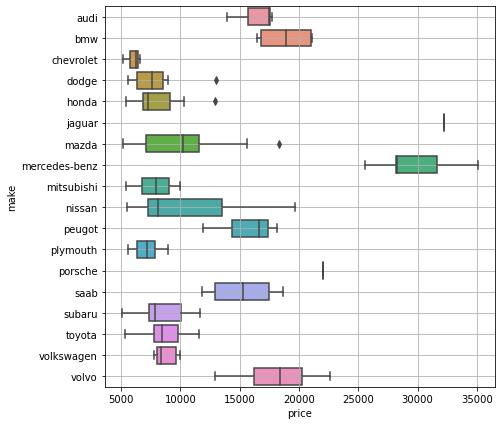

In [18]:
# finding and removing outliers
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x="price",y="make")
plt.grid(True)
plt.show()

In [19]:
#removing outliers of dodge
df[(df["make"]=="dodge") & (df["price"]>9000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,12964


In [20]:
df.drop(index=[29],inplace=True)

In [21]:
#removing outliers of honda
df[(df["make"]=="honda") & (df["price"]>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101,24,28,12945


In [22]:
df.drop(index=[41],inplace=True)

In [23]:
#removing outliers of mazda
df[(df["make"]=="mazda") & (df["price"]>16000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
65,0,118.0,mazda,gas,sedan,rwd,front,66.1,54.4,ohc,140,120,19,27,18280


In [24]:
df.drop(index=[65],inplace=True)

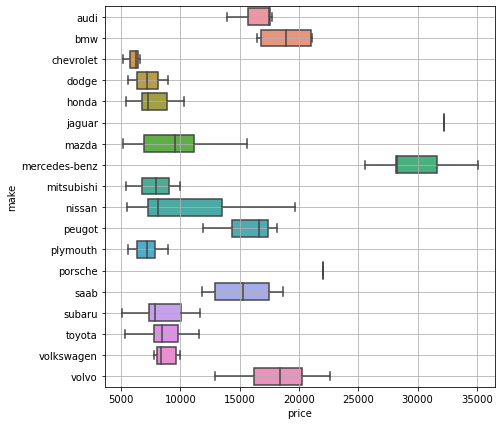

In [25]:
# finding and removing outliers
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x="price",y="make")
plt.grid(True)
plt.show()

In [26]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
6,1,158.0,audi,gas,sedan,fwd,front,71.4,55.7,ohc,136,110,19,25,17710
10,2,192.0,bmw,gas,sedan,rwd,front,64.8,54.3,ohc,108,101,23,29,16430
11,0,192.0,bmw,gas,sedan,rwd,front,64.8,54.3,ohc,108,101,23,29,16925


In [27]:
# handeling categorical data using encoding techniques

In [28]:
df_num=df.select_dtypes([int,float])

In [29]:
df_cat=df.select_dtypes([object])

In [30]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,horsepower
3,audi,gas,sedan,fwd,front,ohc,102
4,audi,gas,sedan,4wd,front,ohc,115
6,audi,gas,sedan,fwd,front,ohc,110
10,bmw,gas,sedan,rwd,front,ohc,101
11,bmw,gas,sedan,rwd,front,ohc,101


In [31]:
# one_hot encoading
pd.get_dummies(df_cat["fuel-type"])

,diesel,gas
3,0,1
4,0,1
6,0,1
10,0,1
11,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [32]:
# Performe one hot encoading on drive wheels column.
pd.get_dummies(df_cat["drive-wheels"])

,4wd,fwd,rwd
3,0,1,0
4,1,0,0
6,0,1,0
10,0,0,1
11,0,0,1
...,...,...,...
200,0,0,1
201,0,0,1
202,0,0,1
203,0,0,1


In [33]:
# label-encoding

# import LabelEncoder class
from sklearn.preprocessing import LabelEncoder

#create an instance of LabelEncoder
le=LabelEncoder()

#apply lable Encoding
le.fit_transform(df_cat["fuel-type"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1])

In [34]:
le.classes_

array(['diesel', 'gas'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

for i in df_cat:
    # create an instance of labelEncoder
    le=LabelEncoder()
    #apply label encoding
    df_cat[i]=le.fit_transform(df_cat[i])

In [36]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,horsepower
3,0,1,3,1,0,2,2
4,0,1,3,0,0,2,8
6,0,1,3,1,0,2,4
10,1,1,3,2,0,2,1
11,1,1,3,2,0,2,1


In [37]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [38]:
df_new.head()

,symboling,normalized-losses,width,height,engine-size,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,horsepower
3,2,164.0,66.2,54.3,109,24,30,13950,0,1,3,1,0,2,2
4,2,164.0,66.4,54.3,136,18,22,17450,0,1,3,0,0,2,8
6,1,158.0,71.4,55.7,136,19,25,17710,0,1,3,1,0,2,4
10,2,192.0,64.8,54.3,108,23,29,16430,1,1,3,2,0,2,1
11,0,192.0,64.8,54.3,108,23,29,16925,1,1,3,2,0,2,1


In [39]:
# feature scaling

In [40]:
# standardization   (z score)-----> standardscaler

# import standardscaler
from sklearn.preprocessing import StandardScaler

# create an instance of a class
sd=StandardScaler()

#apply standard scaler on column
sd.fit_transform(df_new[["width"]])

array([[ 0.35767531],
       [ 0.46345228],
       [ 3.10787638],
       [-0.38276344],
       [-0.38276344],
       [-0.38276344],
       [-0.38276344],
       [-2.76274513],
       [-1.01742522],
       [-1.01742522],
       [-0.91164826],
       [-0.91164826],
       [-0.91164826],
       [-0.91164826],
       [-0.91164826],
       [-0.91164826],
       [-0.91164826],
       [-0.4885404 ],
       [-0.85875978],
       [-0.85875978],
       [-0.8058713 ],
       [-0.8058713 ],
       [-0.8058713 ],
       [-0.8058713 ],
       [-0.85875978],
       [-0.17120951],
       [-0.17120951],
       [-0.17120951],
       [-1.59919853],
       [ 0.25189835],
       [ 2.15588371],
       [-0.70009433],
       [-0.70009433],
       [-0.70009433],
       [-0.70009433],
       [-0.70009433],
       [ 0.0932329 ],
       [ 0.0932329 ],
       [ 0.0932329 ],
       [ 0.0932329 ],
       [ 0.51634076],
       [ 0.51634076],
       [ 0.51634076],
       [ 0.51634076],
       [ 0.51634076],
       [ 2

In [41]:
# normalization

In [42]:
# import MinMaxscaler

# import standardscaler
from sklearn.preprocessing import MinMaxScaler

# create an instance of a class
mn=MinMaxScaler()

#apply standard scaler on column
mn.fit_transform(df_new[["width"]])

array([[0.51754386],
       [0.53508772],
       [0.97368421],
       [0.39473684],
       [0.39473684],
       [0.39473684],
       [0.39473684],
       [0.        ],
       [0.28947368],
       [0.28947368],
       [0.30701754],
       [0.30701754],
       [0.30701754],
       [0.30701754],
       [0.30701754],
       [0.30701754],
       [0.30701754],
       [0.37719298],
       [0.31578947],
       [0.31578947],
       [0.3245614 ],
       [0.3245614 ],
       [0.3245614 ],
       [0.3245614 ],
       [0.31578947],
       [0.42982456],
       [0.42982456],
       [0.42982456],
       [0.19298246],
       [0.5       ],
       [0.81578947],
       [0.34210526],
       [0.34210526],
       [0.34210526],
       [0.34210526],
       [0.34210526],
       [0.47368421],
       [0.47368421],
       [0.47368421],
       [0.47368421],
       [0.54385965],
       [0.54385965],
       [0.54385965],
       [0.54385965],
       [0.54385965],
       [0.87719298],
       [0.87719298],
       [0.877

In [43]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
6,1,158.0,audi,gas,sedan,fwd,front,71.4,55.7,ohc,136,110,19,25,17710
10,2,192.0,bmw,gas,sedan,rwd,front,64.8,54.3,ohc,108,101,23,29,16430
11,0,192.0,bmw,gas,sedan,rwd,front,64.8,54.3,ohc,108,101,23,29,16925


In [44]:
x=df_new.drop('price',axis=1)
x

,symboling,normalized-losses,width,height,engine-size,city-mpg,highway-mpg,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,horsepower
3,2,164.0,66.2,54.3,109,24,30,0,1,3,1,0,2,2
4,2,164.0,66.4,54.3,136,18,22,0,1,3,0,0,2,8
6,1,158.0,71.4,55.7,136,19,25,0,1,3,1,0,2,4
10,2,192.0,64.8,54.3,108,23,29,1,1,3,2,0,2,1
11,0,192.0,64.8,54.3,108,23,29,1,1,3,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,23,28,17,1,3,2,0,2,7
201,-1,95.0,68.8,55.5,141,19,25,17,1,3,2,0,2,18
202,-1,95.0,68.9,55.5,173,18,23,17,1,3,2,0,4,12
203,-1,95.0,68.9,55.5,145,26,27,17,0,3,2,0,2,3


In [45]:
y=df_new["price"]
y

3      13950
4      17450
6      17710
10     16430
11     16925
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 156, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [48]:
#module building 
#step 1 -: import model 
from sklearn.linear_model import LinearRegression

# step 2 -: create an instance / initiate a model
lr=LinearRegression()

# step 3 -: train a model 
lr.fit(xtrain,ytrain)

# step 4 -: make prediction
ypred=lr.predict(xtest)

# evaluate a model
from sklearn.metrics import r2_score

In [49]:
r2_score(ytest,ypred)

0.620341218246677

In [50]:
lr.predict([[3,122.0,64.1,48.8,130,111.0,21,27,0,1,0,2,0,0]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24966.70672514])

In [51]:
lr.predict([[3,2,164.0,66.2,54.3,109,24,30,0,1,3,1,2,2]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([142268.38217652])

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ypred)

5042694.0221212935

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [64]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)

LinearRegression()

In [65]:
train= linreg.score(xtrain,ytrain) # traning accuracy
test= linreg.score(xtest,ytest)  # testing accuracy
print(f"Training Result -: {train}")
print(f"Test Result -: {test}")

Training Result -: 0.8629130632909847
Test Result -: 0.7914671737508482


In [66]:
from sklearn.linear_model import Ridge, Lasso

In [67]:
# L2 regulization

In [68]:
l2=Ridge(alpha=5)
l2.fit(xtrain,ytrain)

Ridge(alpha=5)

In [69]:
train =l2.score(xtrain,ytrain) #Training accuracy
test= l2.score(xtest,ytest)  # testing accuracy
print(f"Training Result -: {train}")
print(f"Test Result -: {test}")


Training Result -: 0.8623411934591065
Test Result -: 0.7919358904926355


In [70]:
# hypertuning Lambda / alpha value
for i in range(1,30):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    test= l2.score(xtest,ytest)
    print(f"value of lambda {i} test score {test}")

value of lambda 1 test score 0.7909118810351816
value of lambda 2 test score 0.7908122005478213
value of lambda 3 test score 0.7910075438226566
value of lambda 4 test score 0.7914024132092179
value of lambda 5 test score 0.7919358904926355
value of lambda 6 test score 0.792566998486947
value of lambda 7 test score 0.7932670368200441
value of lambda 8 test score 0.7940152705199328
value of lambda 9 test score 0.7947963565528368
value of lambda 10 test score 0.795598730070614
value of lambda 11 test score 0.7964135497620511
value of lambda 12 test score 0.797233984144182
value of lambda 13 test score 0.7980547140735369
value of lambda 14 test score 0.798871577106255
value of lambda 15 test score 0.7996813076942058
value of lambda 16 test score 0.8004813438122539
value of lambda 17 test score 0.801269680680258
value of lambda 18 test score 0.8020447585380708
value of lambda 19 test score 0.8028053754769312
value of lambda 20 test score 0.8035506189949235
value of lambda 21 test score 0.80

In [71]:
# final l2 model with best Lambda value

In [72]:
l2=Ridge(alpha=11)
l2.fit(xtrain,ytrain)

Ridge(alpha=11)

In [73]:
train =l2.score(xtrain,ytrain) #Training accuracy
test= l2.score(xtest,ytest)  # testing accuracy
print(f"Training Result -: {train}")
print(f"Test Result -: {test}")


Training Result -: 0.8611235702122018
Test Result -: 0.7964135497620511


In [74]:
# L1 regularization (Lasso - least sbsolute and selection operator)

In [ ]:
for i in range(200,250):
    l1=Lasso(alpha=210)
    l1.fit(xtrain,ytrain)
    test = l1.score(xtest.ytest)
    print(f"value of lambda {i} test score {test}")
    

In [78]:
# final lasso model with best value of Lambda
l1=Lasso(alpha=210)
l1.fit(xtrain,ytrain)
train = l1.score(xtrain,ytrain)
test = l1.score(xtest,ytest)
print(f"Training Result -: {train}")
print(f"Test Result -: {test}")

Training Result -: 0.8479562754365451
Test Result -: 0.7981445445925655
